In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import altair as alt

In [7]:
%pwd

'C:\\Users\\zyang\\Python Geospatial'

In [9]:
path='C:\data\measles_incidence.csv'
data=pd.read_csv(path, skiprows=2, na_values='-')
data.head()

,YEAR,WEEK,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,1,3.67,NaN,1.90,4.11,1.38,8.38,4.50,8.58,...,5.69,22.03,1.18,0.4,0.28,NaN,14.83,3.36,1.54,0.91
1,1928,2,6.25,NaN,6.40,9.91,1.80,6.02,9.00,7.30,...,6.57,16.96,0.63,NaN,0.56,NaN,17.34,4.19,0.96,NaN
2,1928,3,7.95,NaN,4.50,11.15,1.31,2.86,8.81,15.88,...,2.04,24.66,0.62,0.2,1.12,NaN,15.67,4.19,4.79,1.36
3,1928,4,12.58,NaN,1.90,13.75,1.87,13.71,10.40,4.29,...,2.19,18.86,0.37,0.2,6.70,NaN,12.77,4.66,1.64,3.64
4,1928,5,8.03,NaN,0.47,20.79,2.38,5.13,16.80,5.58,...,3.94,20.05,1.57,0.4,6.70,NaN,18.83,7.37,2.91,0.91


In [10]:
annual=data.drop('WEEK',axis=1)

In [12]:
grped=annual.groupby('YEAR')
print(grped)

In [13]:
annual=grped.sum()

In [14]:
annual.head()

,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,FLORIDA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
YEAR,,,,,,,,,,,,,,,,,,,,,
1928,334.99,0.0,200.75,481.77,69.22,206.98,634.95,256.02,535.63,119.58,...,160.16,315.43,97.35,16.83,334.80,0.0,344.82,195.98,124.61,227.00
1929,111.93,0.0,54.88,67.22,72.80,74.24,614.82,239.82,94.20,78.01,...,167.77,33.04,71.28,68.90,105.31,0.0,248.60,380.14,1016.54,312.16
1930,157.00,0.0,466.31,53.44,760.24,1132.76,112.23,109.25,182.10,356.59,...,346.31,179.91,73.12,1044.79,236.69,0.0,631.64,157.70,748.58,341.55
1931,337.29,0.0,497.69,45.91,477.48,453.27,790.46,1003.28,832.99,260.79,...,212.36,134.79,39.56,29.72,318.40,0.0,197.43,291.38,506.57,60.69
1932,10.21,0.0,20.11,5.33,214.08,222.90,348.27,15.98,53.14,13.63,...,96.37,68.99,76.58,13.91,1146.08,53.4,631.93,599.65,935.31,242.10


In [15]:
measles=annual.reset_index()
measles.head()

,YEAR,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,DISTRICT OF COLUMBIA,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,1928,334.99,0.0,200.75,481.77,69.22,206.98,634.95,256.02,535.63,...,160.16,315.43,97.35,16.83,334.80,0.0,344.82,195.98,124.61,227.00
1,1929,111.93,0.0,54.88,67.22,72.80,74.24,614.82,239.82,94.20,...,167.77,33.04,71.28,68.90,105.31,0.0,248.60,380.14,1016.54,312.16
2,1930,157.00,0.0,466.31,53.44,760.24,1132.76,112.23,109.25,182.10,...,346.31,179.91,73.12,1044.79,236.69,0.0,631.64,157.70,748.58,341.55
3,1931,337.29,0.0,497.69,45.91,477.48,453.27,790.46,1003.28,832.99,...,212.36,134.79,39.56,29.72,318.40,0.0,197.43,291.38,506.57,60.69
4,1932,10.21,0.0,20.11,5.33,214.08,222.90,348.27,15.98,53.14,...,96.37,68.99,76.58,13.91,1146.08,53.4,631.93,599.65,935.31,242.10


In [16]:
measles=measles.melt(id_vars="YEAR", value_name="incidence", var_name="state")

In [17]:
measles.head(n=10)

,YEAR,state,incidence
0,1928,ALABAMA,334.99
1,1929,ALABAMA,111.93
2,1930,ALABAMA,157.00
3,1931,ALABAMA,337.29
4,1932,ALABAMA,10.21
5,1933,ALABAMA,65.22
6,1934,ALABAMA,590.27
7,1935,ALABAMA,265.34
8,1936,ALABAMA,20.78
9,1937,ALABAMA,22.46


In [18]:
colormap = alt.Scale(
    domain=[0, 100, 200, 300, 1000, 3000],
    range=[
        "#F0F8FF",
        "cornflowerblue",
        "mediumseagreen",
        "#FFEE00",
        "darkorange",
        "firebrick",
    ],
    type="sqrt",
)

In [20]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [21]:
measles

,YEAR,state,incidence
0,1928,ALABAMA,334.99
1,1929,ALABAMA,111.93
2,1930,ALABAMA,157.00
3,1931,ALABAMA,337.29
4,1932,ALABAMA,10.21
...,...,...,...
3871,1999,WYOMING,0.00
3872,2000,WYOMING,0.00
3873,2001,WYOMING,0.00
3874,2002,WYOMING,0.00


In [22]:
chart = (
   alt.Chart(measles)
    .mark_rect()
   .encode(
       x=alt.X("YEAR:O", axis=alt.Axis(title=None, ticks=False)),
       y=alt.Y("state:N", axis=alt.Axis(title=None, ticks=False)),
       color=alt.Color("incidence:Q", sort="ascending", scale=colormap),
       tooltip=["state", "YEAR", "incidence"],
   )
   .properties(width=700, height=500)
)

chart 

C:\Users\zyang\anaconda3\envs\geo_env\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [23]:
threshold = pd.DataFrame([{"threshold": 1963}])
threshold

,threshold
0,1963


In [24]:
rule = alt.Chart(threshold).mark_rule(strokeWidth=4).encode(x="threshold:O")
chart + rule

C:\Users\zyang\anaconda3\envs\geo_env\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

In [25]:
chart = (
    alt.Chart(measles)
    .mark_rect()
    .encode(
        x=alt.X("YEAR:O", axis=alt.Axis(title=None, ticks=False)),
        y=alt.Y("state:N", axis=alt.Axis(title=None, ticks=False)),
        color=alt.Color(
            "incidence:Q",
            sort="ascending",
            scale=alt.Scale(scheme="viridis"),
            legend=None,
        ),
        tooltip=["state", "YEAR", "incidence"],
    )
    .properties(width=700, height=450)
)

# Vertical line for vaccination year
rule = (
    alt.Chart(threshold).mark_rule(strokeWidth=4, color="white").encode(x="threshold:O")
)

chart + rule

alt.LayerChart(...)

In [26]:
chart = (
    alt.Chart(measles)
    .mark_rect()
    .encode(
        x=alt.X("YEAR:O", axis=alt.Axis(title=None, ticks=False)),
        y=alt.Y("state:N", axis=alt.Axis(title=None, ticks=False)),
        color=alt.Color(
            "incidence:Q",
            sort="ascending",
            scale=alt.Scale(scheme="viridis"),
            legend=None,
        ),
        tooltip=["state", "YEAR", "incidence"],
    )
    .properties(width=700, height=400)
)

# The annual average
annual_avg = (
    alt.Chart(measles)
    .mark_line()
    .encode(
        x=alt.X("YEAR:O", axis=alt.Axis(title=None, ticks=False)),
        y=alt.Y("mean(incidence):Q", axis=alt.Axis(title=None, ticks=False)),
    )
    .properties(width=700, height=200)
)

# Add the vertical line 
rule = (
    alt.Chart(threshold).mark_rule(strokeWidth=4, color="white").encode(x="threshold:O")
)

# Combine everything
alt.vconcat(annual_avg, chart + rule)

alt.VConcatChart(...)

In [32]:
%ls"C:\data\ne_110m_admin_0_countries"

UsageError: Line magic function `%ls"C:\data\ne_110m_admin_0_countries"` not found.


In [33]:
import geopandas as gpd

In [35]:
countries = gpd.read_file(r"C:\data\ne_110m_admin_0_countries")

In [36]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [37]:
type(countries) 

geopandas.geodataframe.GeoDataFrame

In [38]:
countries['geometry'].head(n=10)

0    POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1    MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2    POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3    POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4    MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
5    POLYGON ((43.58275 41.09214, 44.97248 41.24813...
6    MULTIPOLYGON (((-59.57209 -80.04018, -59.86585...
7    POLYGON ((68.93500 -48.62500, 69.58000 -48.940...
8    MULTIPOLYGON (((145.39798 -40.79255, 146.36412...
9    POLYGON ((16.97967 48.12350, 16.90375 47.71487...
Name: geometry, dtype: geometry

In [39]:
countries['pop_est'].sum()/1e9

7.383089462

In [40]:
grouped = countries.groupby('continent')
grouped 

In [41]:
pop_by_continent = grouped['pop_est'].sum()

In [42]:
pop_by_continent.sort_values(ascending=False, inplace=True)


In [43]:
pop_by_continent/1e9

continent
Asia                       4.389145e+00
Africa                     1.219176e+00
Europe                     7.463985e-01
North America              5.730421e-01
South America              4.185407e-01
Oceania                    3.678284e-02
Antarctica                 4.050000e-06
Seven seas (open ocean)    1.400000e-07
Name: pop_est, dtype: float64

In [44]:
is_USA = countries['name']=='United States of America'
USA= countries.loc[is_USA]
USA

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
168,USA,United States of America,North America,326625791.0,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


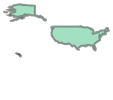

In [45]:
USA.squeeze().geometry

In [46]:
USA=USA.squeeze()
print("The typr of the USA is: ", type(USA))
USA

The typr of the USA is:  <class 'pandas.core.series.Series'>


C:\Users\zyang\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\inference.py:387: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
C:\Users\zyang\anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\inference.py:388: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
C:\Users\zyang\anaconda3\envs\geo_env\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
C:\Users\zyang\a

iso_a3                                                      USA
name                                   United States of America
continent                                         North America
pop_est                                             326625791.0
gdp_md_est                                           18560000.0
geometry      (POLYGON ((-122.84000000000005 49.000000000000...
Name: 168, dtype: object

In [47]:
type(USA.geometry)

shapely.geometry.multipolygon.MultiPolygon

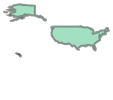

In [48]:
USA.geometry

In [49]:
countries.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Equirectangular Projection')

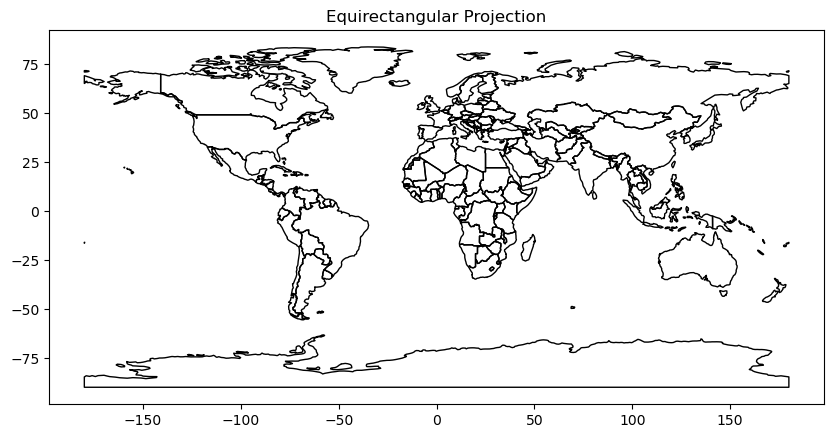

In [51]:
fig,ax =plt.subplots(figsize=(10,6))
ax=countries.plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_title("Equirectangular Projection")